In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

from scipy.optimize import minimize
from sklearn import linear_model



#load in mnist dataset

        #test images and labels:
import gzip 

f=gzip.open('t10k-labels-idx1-ubyte.gz','rb') 

label=f.read()

testlbl=[0]*10000
for i in range(10000):
    testlbl[i]=label[i+8]


with gzip.open('t10k-images-idx3-ubyte.gz','r') as f:
   image_size = 28
   num_images = 10000
   f.read(16)
   buffer = f.read(image_size * image_size * num_images)
   test = np.frombuffer(buffer, dtype=np.uint8).astype(np.float32)
   test = test.reshape(num_images, image_size, image_size, 1)

####################################################################
        #training images and labels:
    
f=gzip.open('train-labels-idx1-ubyte.gz','rb') 

trainlabel=f.read()

trainlbl=[0]*60000
for i in range(60000):
    trainlbl[i]=trainlabel[i+8]


with gzip.open('train-images-idx3-ubyte.gz','r') as f:
   image_size = 28
   num_images = 60000
   f.read(16)
   buffer = f.read(image_size * image_size * num_images)
   train = np.frombuffer(buffer, dtype=np.uint8).astype(np.float32)
   train = train.reshape(num_images, image_size, image_size, 1)



In [40]:
m=28

In [55]:
#turn entries in labels into 10x1 vectors and create B matrix using m of the 10 dimensional vectors as columns
B = np.zeros([m,10])

for i in range(m):
    if int(trainlbl[i]) == 0:
        B[i][9]=1
    if trainlbl[i] > 0:
        B[i][trainlbl[i]] = 1
   

#Create X matrix
X = []
for i in range(m):
      X.append(train[i].reshape(784))


In [76]:
#Now we try to find a transform between the image space and label space. We start with regular inverse approximation:
A=np.linalg.pinv(X)@B


#Now we test A on some test images and record the results:
b=[]
for i in range(100):
    b.append(test[i].reshape(784)@A)

#Lets take the biggest entry in each b[i] and see if its index matches testlbl[i] :

results=[0]*100
for i in range(100):
    maxindice =[b[i][0],1]
    for j in range(10):
        if b[i][j] > maxindice[0]:
            maxindice =[b[i][j],(j+1)%10]
    if testlbl[i]==maxindice[1]:
        results[i]=1

print('So our percent of success is', sum(results))
        


So our percent of success is 7


Thus we can conclude that the pinv method is nowhere near sufficent for this problem. We will try the elastic net model next

In [84]:
lam=0.1
regr2 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
regr2.fit(X, B) 
A = regr2.coef_


#Now we test A on some test images and record the results:
b=[]
for i in range(100):
    b.append(A@test[i].reshape(784))

    

#Lets take the biggest entry in each b[i] and see if its index matches testlbl[i] :
results=[0]*100
for i in range(100):
    maxindice =[b[i][0],1]
    for j in range(10):
        if b[i][j] > maxindice[0]:
            maxindice =[b[i][j],(j+1)%10]
    if testlbl[i]==maxindice[1]:
        results[i]=1

print('So our percent of success is', sum(results))


C:\Users\Danii\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


So our percent of success is 6


Elastic Net also seems to not be working very well.

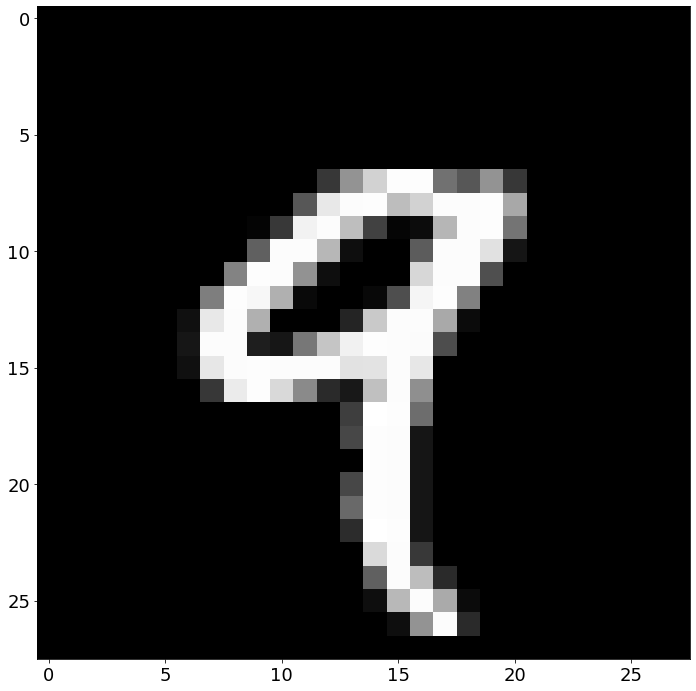

In [12]:

plt.imshow(train[1], cmap=plt.get_cmap('gray'))
plt.show()

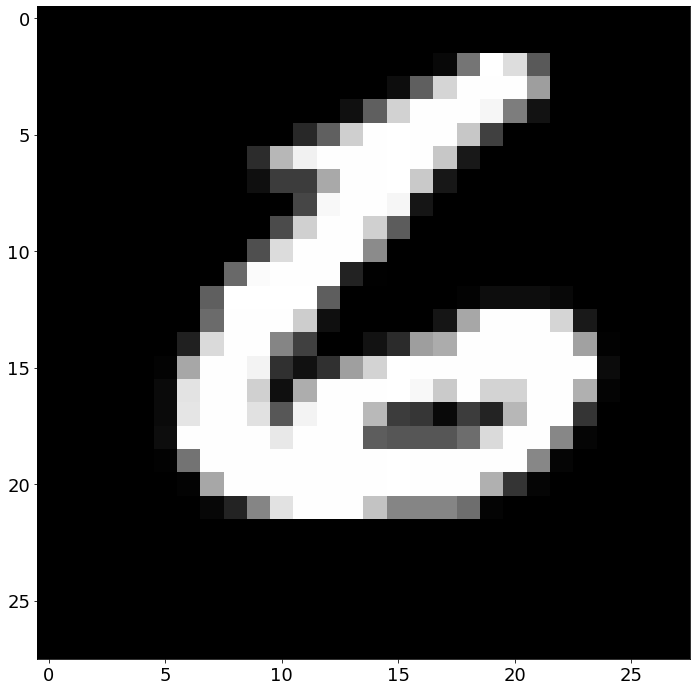

In [5]:
plt.imshow(test[9999], cmap=plt.get_cmap('gray'))
plt.show()